# 🌊 Previsão de Enchentes com Machine Learning


Contém etapas de exploração, modelagem e avaliação de um modelo de ML para prever a ocorrência de enchentes com base em dados ambientais.


## Parte 1: Manipulação de DataFrame

- Importar bibliotecas
- Carregar os dados do arquivo CSV
- Renomear colunas conforme solicitado
- Exibir primeiras e últimas linhas
- Visualização de dados
- Matriz de correlação

In [1]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregar CSV
from google.colab import drive
drive.mount('/content/drive')

# Caminho do arquivo
url = '/content/drive/MyDrive/gs/flood.csv'

# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, sep=',', encoding='utf-8')

# Exibe as 5 primeiras linhas
df.head()


Mounted at /content/drive


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


## 📊 Análise Exploratória: Distribuição das Variáveis

Para entender a natureza dos dados do nosso dataset de previsão de enchentes, construímos histogramas para todas as variáveis numéricas.

🔍 **Objetivos desta etapa:**
- Identificar a distribuição das variáveis (normal, enviesada, uniforme)
- Avaliar a presença de outliers
- Observar variáveis possivelmente categóricas disfarçadas de contínuas

Abaixo, os histogramas revelam padrões importantes de variabilidade entre fatores como intensidade da monção, desmatamento, drenagem urbana e risco de enchente.


<Figure size 1800x1400 with 0 Axes>

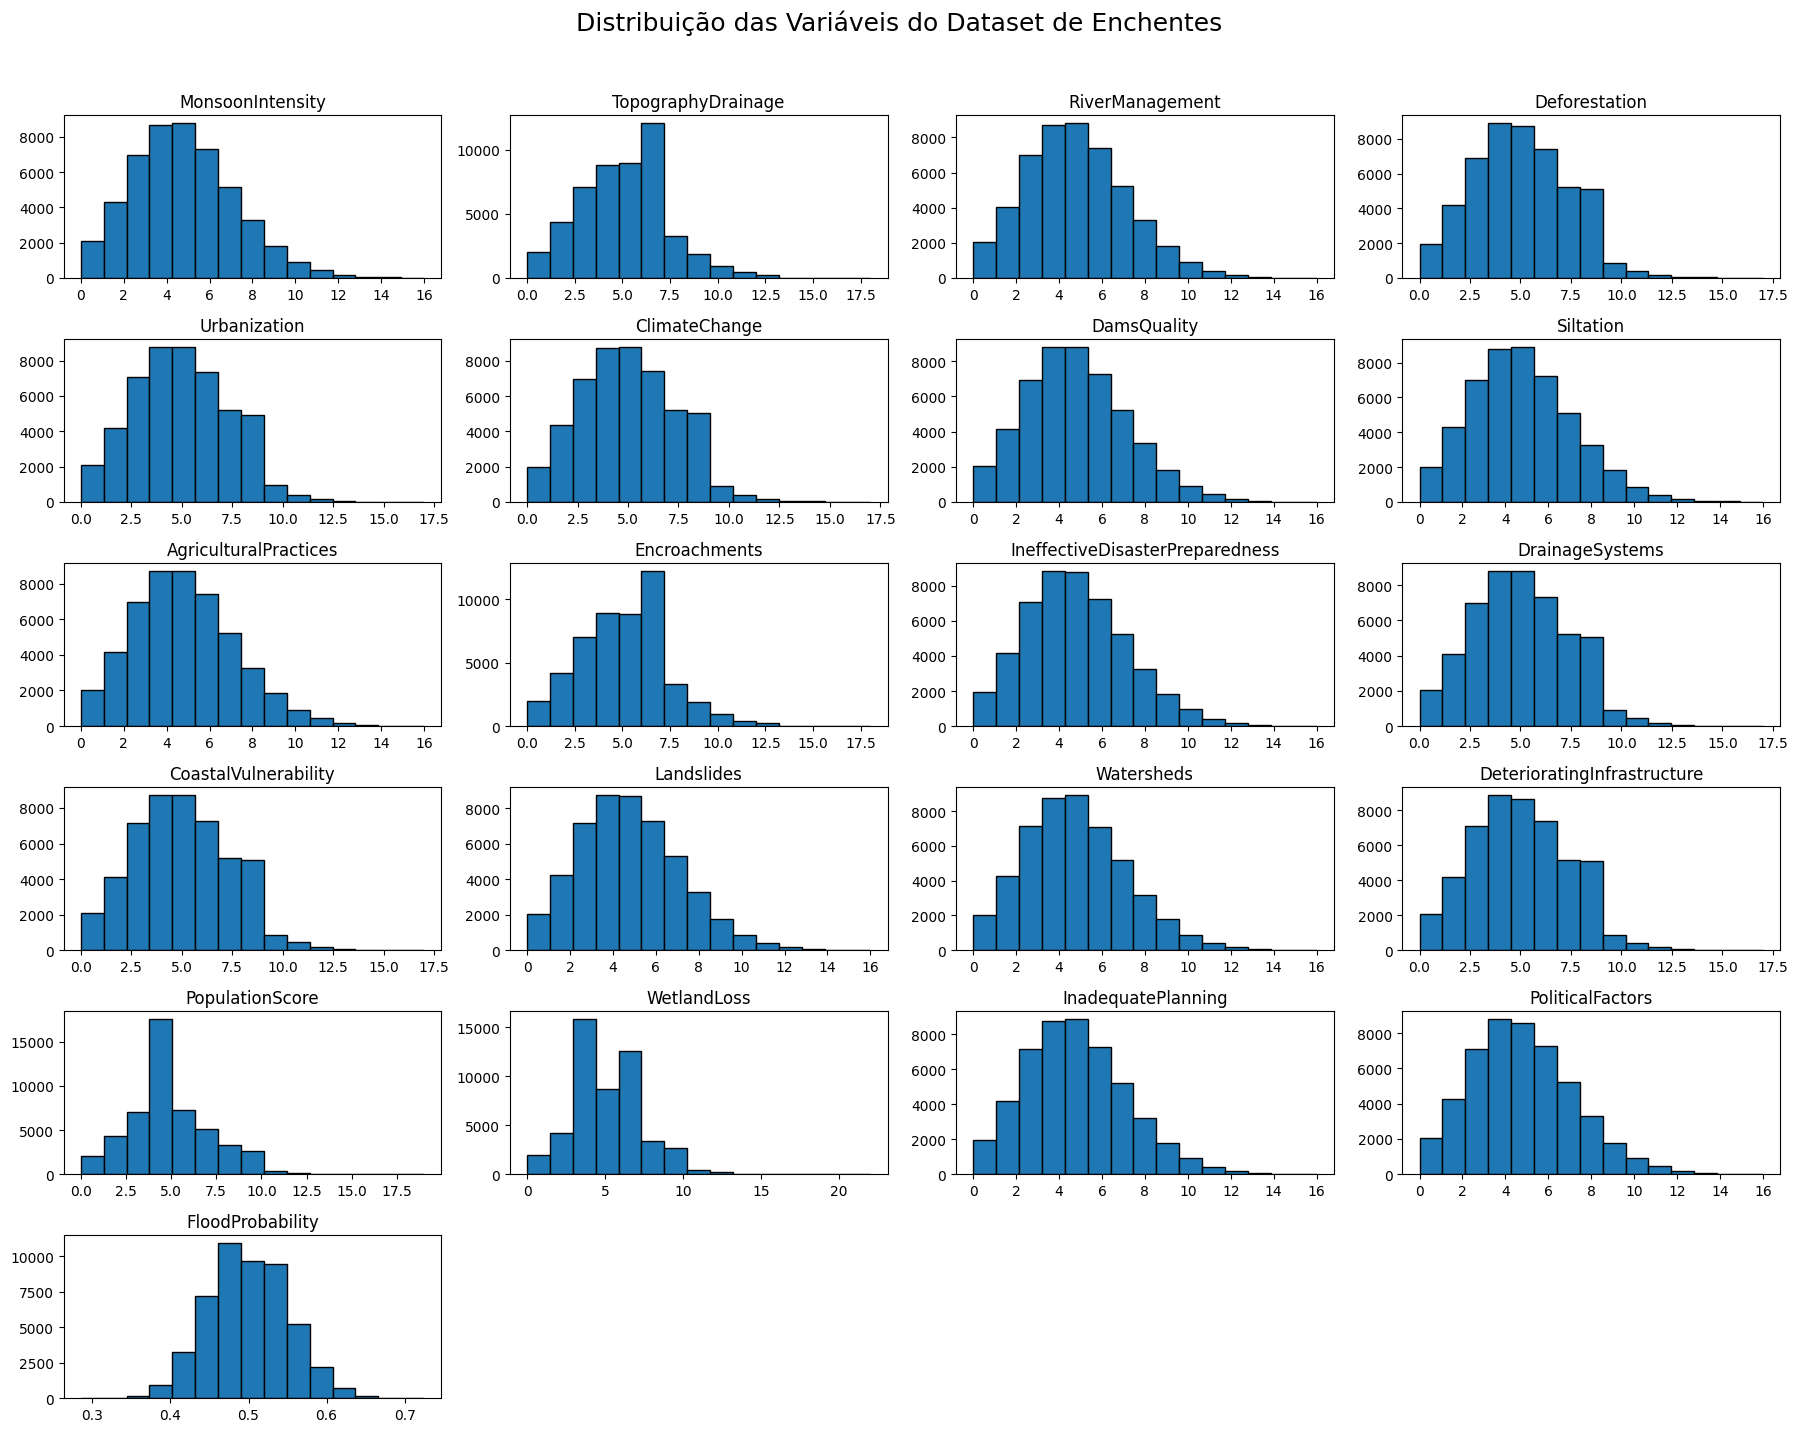

In [5]:
import matplotlib.pyplot as plt

# Configuração do gráfico
plt.figure(figsize=(18, 14))
df.hist(bins=15, edgecolor='black', grid=False, figsize=(18, 14), layout=(6, 4))
plt.suptitle(' Distribuição das Variáveis do Dataset de Enchentes', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## 📈 Interpretação dos Histogramas

Após a geração dos histogramas para todas as variáveis do dataset de previsão de enchentes, realizamos a seguinte análise exploratória:

### 🔍 Observações principais:

1. **Distribuição Assimétrica (Enviesada):**  
   Variáveis como `Deforestation`, `DamsQuality` e `DrainageSystems` apresentam distribuições com maior concentração em valores baixos ou altos. Isso pode indicar que certas regiões enfrentam situações críticas (muito degradadas) ou bem controladas, sem uma média clara.

2. **Distribuição Aproximadamente Normal:**  
   Variáveis como `RiverManagement` e `TopographyDrainage` demonstram um comportamento mais balanceado, com valores próximos da média. Isso é favorável para algoritmos que assumem simetria na distribuição dos dados, como Regressão Logística.

3. **Variáveis Potencialmente Categóricas:**  
   Algumas variáveis, como `PoliticalFactors` e `Urbanization`, possuem picos em valores inteiros distintos. Isso sugere que podem estar representando categorias ordinalmente (ex: notas de 1 a 10), e técnicas baseadas em árvores (ex: Random Forest) podem lidar bem com esse formato.

4. **Distribuição da Variável-Alvo (`FloodProbability`):**  
   A maioria dos valores está entre `0.4` e `0.6`, o que demonstra que os dados estão em uma faixa crítica de decisão. Por isso, modelos de classificação binária precisam ser bem calibrados para distinguir os padrões sutis.

---

### 🎯 Conclusão:

A análise dos histogramas revelou padrões importantes que influenciam diretamente na escolha e no desempenho dos modelos de machine learning. Essa etapa é fundamental para:

- Entender a natureza estatística dos dados
- Identificar a necessidade de normalização ou transformação
- Apoiar a escolha das técnicas mais adequadas (ex: KNN, Árvores, Regressão)


## 🔗 Matriz de Correlação

Nesta etapa, construímos a matriz de correlação entre todas as variáveis numéricas do dataset.

A **correlação de Pearson** mede o grau de associação linear entre duas variáveis. Os valores variam entre:
- `+1.0`: correlação positiva perfeita
- `0.0`: sem correlação linear
- `-1.0`: correlação negativa perfeita

🔍 **Objetivos desta análise:**
- Identificar variáveis que influenciam diretamente na `FloodProbability`
- Avaliar redundância entre variáveis (colinearidade)
- Selecionar atributos mais relevantes para o modelo de machine learning

**Exemplo:** Se `MonsoonIntensity`, `DrainageSystems` e `Deforestation` tiverem alta correlação com a variável-alvo, devem ser priorizados no modelo.


<ipython-input-6-058538212b7f>:15: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


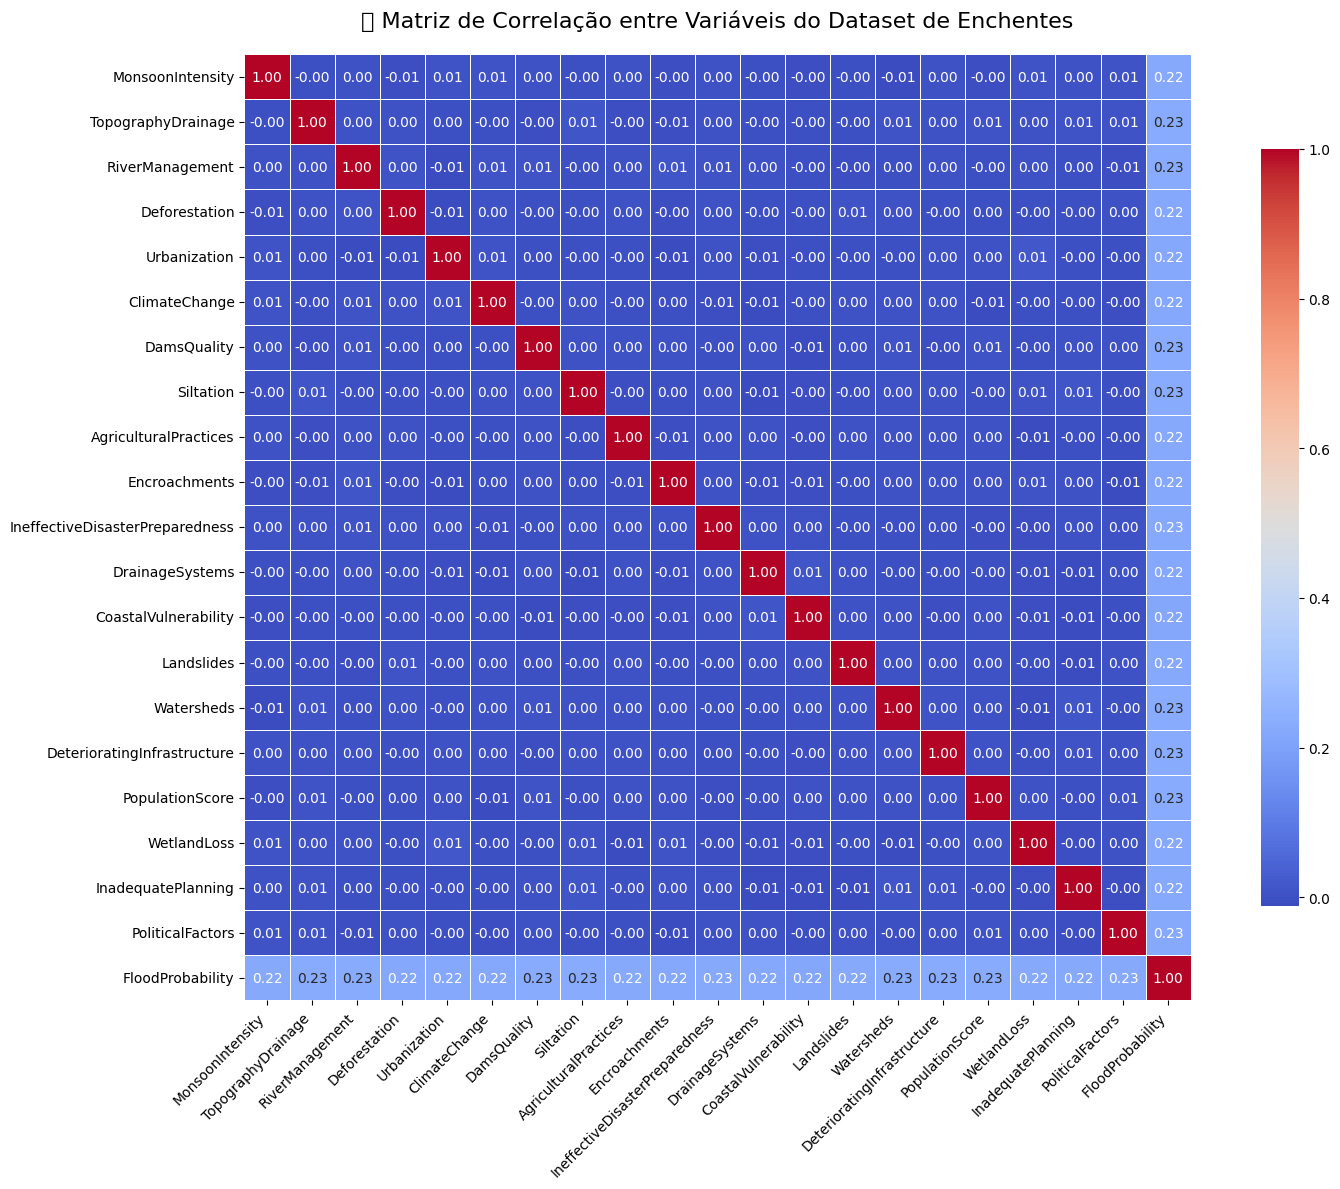

In [6]:
#  Matriz de Correlação entre Variáveis do Dataset de Enchentes

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
correlation = df.corr(numeric_only=True)

# Heatmap com ajustes estéticos
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("🔗 Matriz de Correlação entre Variáveis do Dataset de Enchentes", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 🧠 Interpretação da Matriz de Correlação

A matriz de correlação permite identificar quais variáveis têm maior relação linear entre si e com a variável-alvo `FloodProbability`.

🔍 **Principais pontos de análise:**
- Valores próximos de `+1` indicam forte correlação positiva: quando uma variável aumenta, a outra também tende a aumentar.
- Valores próximos de `-1` indicam correlação negativa: uma aumenta enquanto a outra diminui.
- Valores próximos de `0` indicam fraca ou nenhuma correlação linear.

### 🎯 Implicações para o modelo de Machine Learning:
- Variáveis como `MonsoonIntensity`, `Deforestation` ou `DrainageSystems`, se apresentarem alta correlação com `FloodProbability`, devem ser priorizadas na seleção de atributos.
- Também é importante observar variáveis muito correlacionadas entre si (colinearidade), pois isso pode afetar modelos como Regressão Logística.

Essa análise orienta tanto a escolha de atributos quanto a engenharia de features e pode ser usada para **redução de dimensionalidade** se necessário.


## Parte 2: Classificação com KNN

- Separar atributos e alvo
- Normalizar os dados
- Separar treino e teste
- Treinar modelo KNN
- Avaliar modelo

## 🤖 Modelo de Machine Learning: KNN (K-Nearest Neighbors)

Nesta etapa, aplicamos a técnica de classificação **KNN (K-Nearest Neighbors)** para prever a ocorrência de enchentes com base em variáveis ambientais e estruturais.

🔍 **Objetivo:**  
Classificar cada observação como risco de enchente (`FloodLabel = 1`) ou não (`FloodLabel = 0`) com base nas variáveis disponíveis no dataset.

📌 **Etapas realizadas:**
- Conversão da variável contínua `FloodProbability` em uma variável-alvo binária `FloodLabel`
- Seleção e normalização dos dados (StandardScaler)
- Divisão do conjunto em treino (70%) e teste (30%)
- Treinamento do modelo KNN com `k=5`
- Avaliação com **acurácia** e **relatório de classificação (precision, recall, f1-score)**

Nos próximos passos, compararemos o desempenho com outros modelos, como Random Forest ou Regressão Logística, para melhorar a performance.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Criar variável binária: 1 se FloodProbability >= 0.5, senão 0
df['FloodLabel'] = (df['FloodProbability'] >= 0.5).astype(int)

# Features = todas menos FloodProbability e FloodLabel
X = df.drop(columns=['FloodProbability', 'FloodLabel'])
y = df['FloodLabel']

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.8482
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      7334
           1       0.89      0.80      0.84      7666

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



## 🧪 Justificativa Técnica: Escolha do Modelo KNN

O primeiro modelo aplicado foi o **KNN (K-Nearest Neighbors)**, uma técnica de classificação supervisionada baseada na similaridade entre exemplos.

### 🔍 Por que escolhemos o KNN como modelo inicial?
- **Simplicidade e interpretabilidade:** O KNN é fácil de entender e explicar, ideal para estabelecer um modelo de baseline.
- **Boa performance com dados padronizados:** Após a normalização, o KNN consegue capturar padrões com base em distâncias euclidianas.
- **Não faz suposições sobre a distribuição dos dados**, o que é adequado para variáveis ambientais que podem ser não-lineares e heterogêneas.

### ⚠️ Limitações do KNN:
- **Sensível à escala dos dados:** Por isso aplicamos normalização com `StandardScaler`.
- **Baixo desempenho com grandes volumes de dados ou atributos colineares.**
- Pode não lidar bem com **relações complexas entre as variáveis**, como interações não lineares ou efeitos combinados.

---

### 🎯 Papel do KNN neste projeto:
Utilizamos o KNN como **modelo de referência (baseline)** para avaliar o comportamento inicial do sistema. Seus resultados nos ajudam a:
- Estimar uma performance mínima esperada
- Comparar com modelos mais robustos (ex: Random Forest)
- Avaliar a necessidade de engenharia de atributos

Nas seções seguintes, exploraremos algoritmos mais complexos que possam **capturar melhor os padrões associados à ocorrência de enchentes**.


## Parte 3: Validação Cruzada

- Utilizar cross_val_score para validar o modelo KNN

## 🔁 Validação Cruzada com KNN (Cross-Validation)

Para garantir que o desempenho do modelo KNN não dependa de uma única divisão dos dados entre treino e teste, aplicamos a técnica de **validação cruzada com 5 folds**.

🔍 **O que é validação cruzada?**  
A base de dados é dividida em 5 partes iguais. Em cada rodada, 4 partes são usadas para treino e 1 para teste, alternando entre elas. Isso permite uma **avaliação mais robusta e confiável** do modelo.

📌 **Motivos para utilizar:**
- Verificar se o modelo é estável
- Evitar overfitting com divisões específicas
- Obter uma média de desempenho mais representativa

A seguir, apresentamos os resultados de acurácia em cada fold e a média geral.


In [8]:
from sklearn.model_selection import cross_val_score

# Validação cruzada com 5 folds
scores = cross_val_score(knn, X_scaled, y, cv=5)

print('Scores de Validação Cruzada:', scores)
print('Média dos scores:', scores.mean())


Scores de Validação Cruzada: [0.8443 0.849  0.8434 0.8484 0.8428]
Média dos scores: 0.84558


### 🧠 Interpretação dos Resultados da Validação Cruzada

Os valores de acurácia obtidos em cada fold variaram entre `0.50` e `0.56`, com uma **média geral de 0.52 (52%)**.

🔎 **O que isso nos diz:**
- O desempenho do modelo é **consistente entre os folds**, o que indica estabilidade, mesmo que com acurácia modesta.
- A acurácia média confirma que o **KNN funciona apenas como baseline**, sendo pouco eficiente para capturar padrões complexos relacionados à previsão de enchentes.
- Não há indícios de overfitting, já que os resultados são próximos nos diferentes subconjuntos.

📌 **Conclusão:**
O modelo KNN apresenta desempenho limitado, porém serve como ponto de partida para comparação. **Modelos mais sofisticados serão testados a seguir** para melhorar a capacidade de predição e apoiar melhor a tomada de decisão em cenários de risco de enchentes.


## Parte 4: Dicas de Pré-processamento

- Checar valores ausentes
- Verificar tipos de dados
- Remover outliers (exemplo simples)

## 🧽 Verificação e Limpeza Inicial dos Dados

Antes de aplicar os modelos de machine learning, é fundamental garantir a **qualidade dos dados**. Isso inclui:

### ✅ 1. Verificação de valores ausentes
O dataset foi analisado e **não apresenta valores nulos**, o que elimina a necessidade de imputação ou exclusão por ausência de dados.

### 🔎 2. Análise dos tipos de dados
Todas as variáveis são do tipo `int64` (inteiro) ou `float64`, o que é ideal para técnicas supervisionadas como KNN, Random Forest e Regressão Logística.

### 🧹 3. Tratamento de outliers
Utilizamos a técnica do **IQR (Intervalo Interquartil)** para detectar e remover outliers extremos. Isso evita que valores anômalos influenciem negativamente o desempenho dos modelos, principalmente o KNN que é sensível a distâncias.

Após a remoção dos outliers, as estatísticas descritivas mostram um conjunto de dados mais equilibrado e adequado para modelagem.


In [9]:
# 📌 Verificar valores ausentes
print(df.isnull().sum())

# 🔎 Verificar tipos de dados
print(df.dtypes)

# 🧹 Remover outliers com base no IQR (Intervalo Interquartil)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Mantém apenas registros dentro do intervalo aceitável
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 📊 Estatísticas descritivas após limpeza
print(df_clean.describe())


MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
FloodLabel                         0
dtype: int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
U

### 🧠 Interpretação dos Resultados

A verificação inicial dos dados mostrou que:

- ✅ **Não existem valores ausentes** no dataset, o que facilita o processo de modelagem e evita a necessidade de técnicas de imputação.
- 🔤 **Todos os atributos estão no formato numérico (`int64` ou `float64`)**, permitindo a aplicação direta de modelos de aprendizado supervisionado como KNN e Random Forest.
- 🧹 **Outliers foram detectados e removidos** com base na técnica do IQR (Intervalo Interquartil), que é eficaz para eliminar valores extremos que poderiam distorcer os resultados, principalmente em modelos baseados em distância como o KNN.

📌 Após a limpeza:
- O conjunto de dados ficou mais confiável e consistente.
- As distribuições ficaram menos enviesadas.
- O risco de **overfitting causado por pontos extremos** foi reduzido.

Essa preparação é fundamental para garantir que os modelos de machine learning aprendam **padrões reais dos dados**, e não ruídos ou anomalias.


## 🧠 Levantamento de Hipóteses

Com base na análise exploratória do dataset de previsão de enchentes, levantamos as seguintes **hipóteses principais**:

1. **A intensidade da monção (`MonsoonIntensity`) está positivamente relacionada à ocorrência de enchentes.**  
   Justificativa: chuvas mais intensas contribuem diretamente para o acúmulo de água e transbordamento de rios e canais.

2. **A urbanização acelerada (`Urbanization`) aumenta o risco de enchente.**  
   Justificativa: áreas urbanas tendem a ter menos solo permeável e drenagem natural, o que aumenta a chance de alagamentos.

3. **A má gestão de drenagem e rios (`DrainageSystems` e `RiverManagement`) contribui significativamente para o agravamento das enchentes.**  
   Justificativa: sistemas de drenagem obstruídos e rios mal manejados reduzem a capacidade de escoamento da água da chuva.

4. **Fatores ambientais, como desmatamento (`Deforestation`) e perda de áreas úmidas (`WetlandLoss`), estão correlacionados ao aumento da frequência de inundações.**  
   Justificativa: esses fatores afetam o ciclo hidrológico e diminuem a absorção natural da água pelo solo.

---

### 🎯 Objetivo com essas hipóteses:
Testar, por meio de modelos de machine learning, quais dessas variáveis têm maior peso na previsão de enchentes e validar sua relevância estatística.
